In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas.tools import plotting

In [3]:
import urllib.request

In [4]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sake_dataJ.txt'
urllib.request.urlretrieve(url, 'alcohol.txt')

('alcohol.txt', <http.client.HTTPMessage at 0x1074c9400>)

In [5]:
df = pd.read_csv('alcohol.txt', sep='\t') 

In [6]:
df

,Pref,Sake,Shochu,Bear,Wine,Whisky
0,Hokkaido,46476000,50642000,315300000,10488000,9749000
1,Aomori,17273000,11503000,83164000,1774000,3122000
2,Iwate,17120000,10220000,67803000,1458000,1870000
3,Miyagi,27859000,11768000,109850000,2824000,5049000
4,Akita,24153000,6240000,67894000,1242000,2099000
5,Yamagata,20570000,6067000,61130000,1706000,2466000
6,Fukushima,31016000,11166000,100122000,1885000,3807000
7,Ibaraki,29492000,15105000,126866000,2431000,3012000
8,Tochigi,19317000,10681000,84792000,1563000,2000000
9,Gunma,19507000,15787000,89126000,2173000,1854000


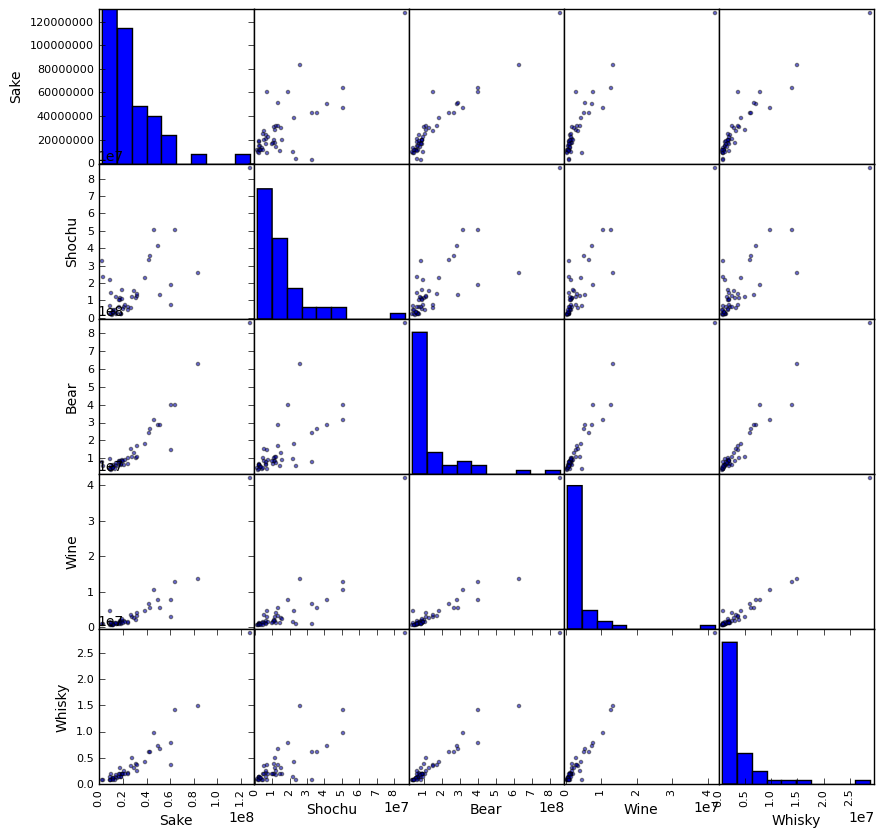

In [7]:
plotting.scatter_matrix(df.dropna(axis=1)[df.columns[:]], figsize=(10, 10)) 
plt.show()

突出して高いところがあることがわかる。  
相関係数は高そうに見える。

In [8]:
pd.DataFrame(np.corrcoef(df.dropna().iloc[:, 1:].T.as_matrix().tolist()), 
             columns=df.columns[1:], index=df.columns[1:])

,Sake,Shochu,Bear,Wine,Whisky
Sake,1.000000,0.738865,0.952417,0.883041,0.940801
Shochu,0.738865,1.000000,0.813708,0.844892,0.849852
Bear,0.952417,0.813708,1.000000,0.918850,0.969909
Wine,0.883041,0.844892,0.918850,1.000000,0.965348
Whisky,0.940801,0.849852,0.969909,0.965348,1.000000


In [9]:
print(pd.DataFrame(np.corrcoef(df.dropna().iloc[:, 1:].T.as_matrix().tolist()), 
             columns=df.columns[1:], index=df.columns[1:]))

            Sake    Shochu      Bear      Wine    Whisky
Sake    1.000000  0.738865  0.952417  0.883041  0.940801
Shochu  0.738865  1.000000  0.813708  0.844892  0.849852
Bear    0.952417  0.813708  1.000000  0.918850  0.969909
Wine    0.883041  0.844892  0.918850  1.000000  0.965348
Whisky  0.940801  0.849852  0.969909  0.965348  1.000000


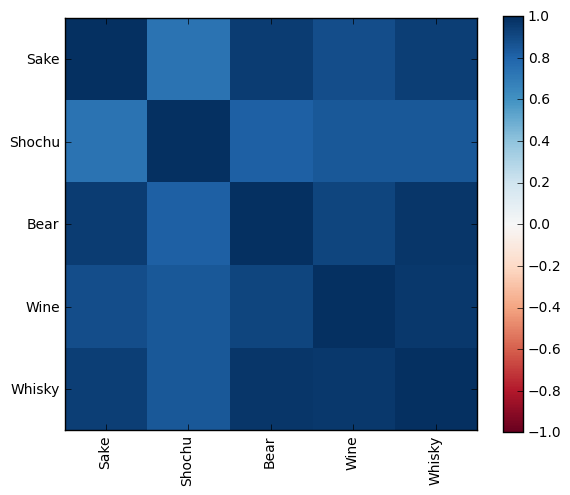

In [9]:
corrcoef = np.corrcoef(df.dropna().iloc[:, 1:].T.as_matrix().tolist())
plt.figure(figsize=(6, 5))
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.RdBu, vmin = -1, vmax = 1)
plt.colorbar()
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, df.columns[1:], rotation=90)
plt.yticks(tick_marks, df.columns[1:])
plt.tight_layout()

ほとんど真っ青で全ての相関係数が非常に高いことがわかる。
つまりどの県でも酒を飲む人はこれら全ての種類の酒を飲む。

続いてPCAによる分析

In [10]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [11]:
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [12]:
dfs.index = df.iloc[:, 0]

In [13]:
dfs

,Sake,Shochu,Bear,Wine,Whisky
Pref,,,,,
Hokkaido,0.811237,2.147580,1.057634,1.029017,1.207049
Aomori,-0.437580,-0.210625,-0.389028,-0.298893,-0.126779
Iwate,-0.444123,-0.287929,-0.484757,-0.347047,-0.378772
Miyagi,0.015112,-0.194659,-0.222722,-0.138885,0.261072
Akita,-0.143369,-0.527732,-0.484190,-0.379963,-0.332681
Yamagata,-0.296590,-0.538156,-0.526343,-0.309255,-0.258814
Fukushima,0.150116,-0.230930,-0.283346,-0.281978,0.011092
Ibaraki,0.084945,0.006402,-0.116679,-0.198774,-0.148919
Tochigi,-0.350172,-0.260153,-0.378882,-0.331047,-0.352606


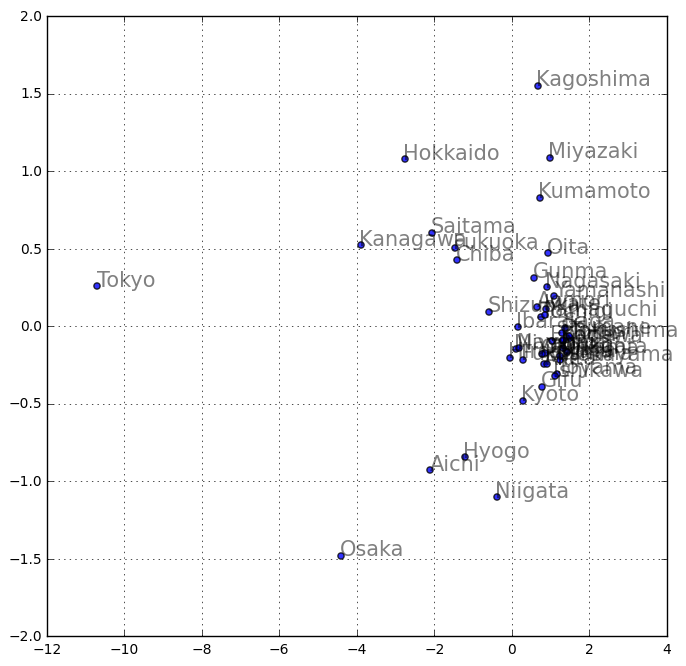

In [14]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()


首都圏と大阪福岡などの大都市が塊から外れていることがわかる。

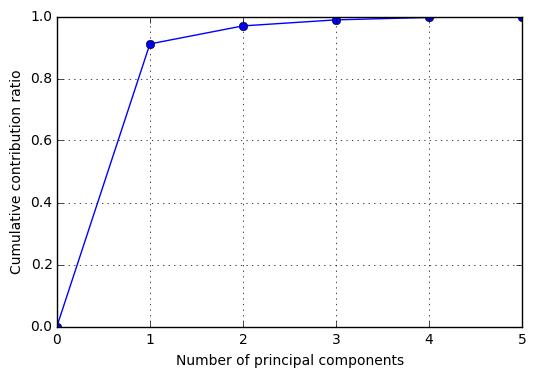

In [15]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

第一成分と第二成分がほぼ全ての割合を占めていることがわかる。つまり都道府県別に見たときに都道府県の特徴はだいたい2種類あるということになる。  
第一成分は大都市が比較的外れており、東京が大きく外れていることから酒類の総消費量であると予測できる。(E=A+B+C+Dみたいな軸をとっている)  
第二成分は鹿児島大阪が外れており、東京がほぼゼロに近いことから、酒類の総消費量に対する日本酒の割合であることが予測できる。

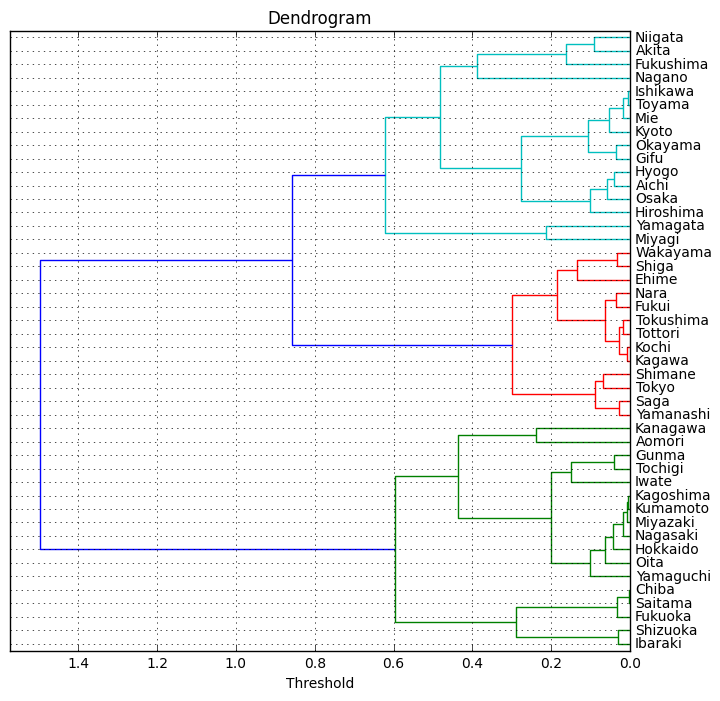

In [16]:
# 階層的クラスタリング
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.iloc[:, :], metric = 'correlation',method = 'average')
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(dfs.index), color_threshold=0.8)
plt.title("Dendrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

だいたい3つのグループに分けることができることがわかった

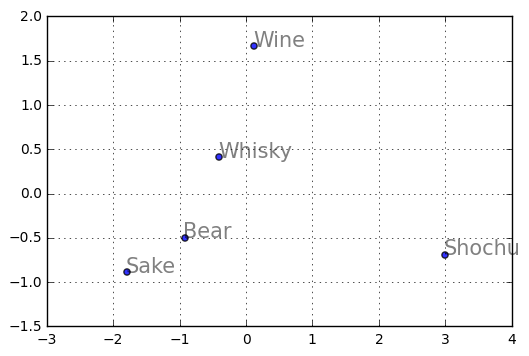

In [17]:
pca = PCA()
pca.fit(dfs.iloc[:, :].T)
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :].T)
# 第一主成分と第二主成分でプロットする
plt.figure()
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.columns):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

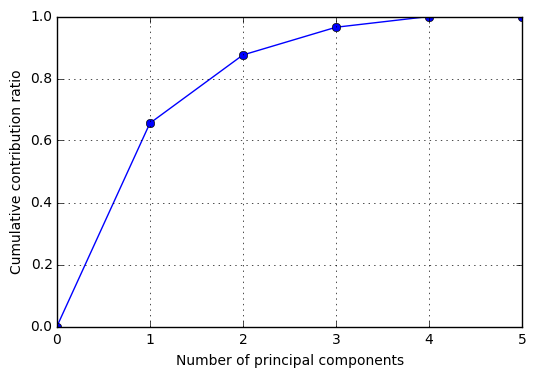

In [18]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()


第三成分までが大半の割合を占めていることがわかる。つまり酒を分類する成分は約3種類あるということがわかる

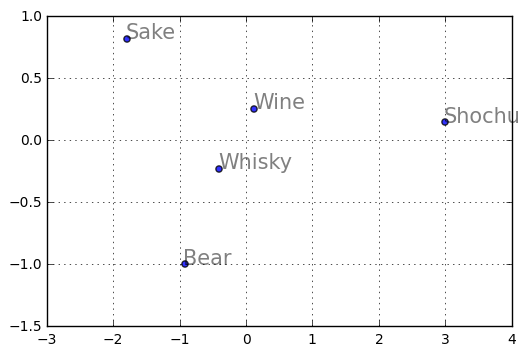

In [19]:
# 第一成分と第三成分でプロット
plt.figure()
for x, y, name in zip(feature[:, 0], feature[:, 2], dfs.columns):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 2], alpha=0.8)
plt.grid()
plt.show()

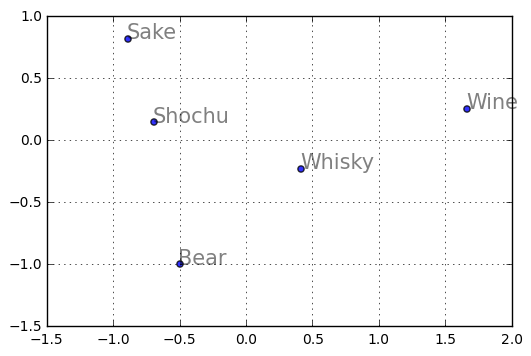

In [20]:
# 第二成分と第三成分でプロット
plt.figure()
for x, y, name in zip(feature[:, 1], feature[:, 2], dfs.columns):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 1], feature[:, 2], alpha=0.8)
plt.grid()
plt.show()

第一成分は焼酎、日本酒が高く、第二成分はワインが高い、第三成分は日本酒とビールが高い。

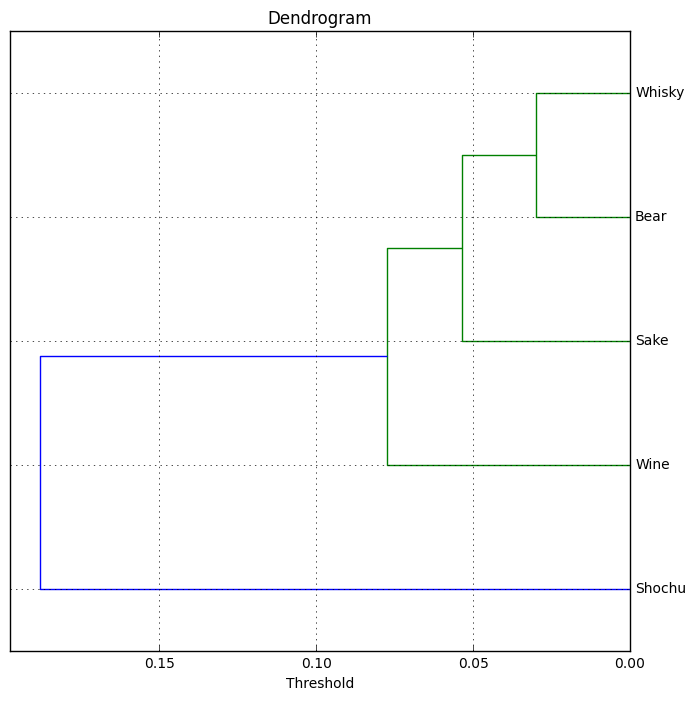

In [21]:
# 階層的クラスタリング
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs.T.iloc[:, :], metric = 'correlation',method = 'average')
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(dfs.columns), color_threshold=0.1)
plt.title("Dendrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

焼酎と残りの酒の差が大きいことがわかった。